<a href="https://colab.research.google.com/github/Kalebe-Nascimento/Data-Mining-Candy-Rank/blob/main/Candy_Rank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Minera√ß√£o de Dados

O objetivo deste trabalho √© aplicar t√©cnicas de minera√ß√£o de dados para explorar e analisar informa√ß√µes valiosas sobre a popularidade de doces de Halloween. Por meio de um confronto direto entre diferentes doces, buscamos identificar qual deles se destaca como o favorito entre os consumidores. Essa an√°lise permitir√° compreender quais caracter√≠sticas tornam um doce mais desejado, utilizando dados de ranking para definir o campe√£o entre os doces de Halloween.


### Base de Dados

Base de dados dispon√≠vel em: free Data Sets & Dataset Samples <
https://mavenanalytics.io/data-playground?accessType=open&order=date_added%2Cdesc >


#Importa√ß√£o das bibliotecas inicias e adi√ß√£o do google drive ao projeto

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import display

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Algumas configura√ß√µes do notebook para leitura

In [3]:
warnings.filterwarnings('ignore')
%config IPCompleter.greedy = True
pd.options.display.max_rows = None
pd.options.display.max_columns = None
pd.options.display.precision = 2

Importa√ß√£o do chardet e cria√ß√£o do path para idicar a base dados *(candy-data.cvs)* salva no google colab

In [4]:
import chardet

candy_rank = open('/content/drive/MyDrive/Colab Notebooks/P2-MineracaoDados/candy-data.csv', 'rb').read()
result = chardet.detect(candy_rank)
charenc = result['encoding']
print(charenc)
print(result)

ascii
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


Adicionando a nossa base de dados e mostrando seu shape



In [5]:
candy_rank = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/P2-MineracaoDados/candy-data.csv', encoding='utf-8')
candy_rank.drop_duplicates(inplace=True)
candy_rank.shape

(85, 13)

mostrando o cabe√ßalho da nossa base de dados

In [6]:
candy_rank.head()

competitorname  chocolate  fruity  caramel  peanutyalmondy  nougat  \
0      100 Grand          1       0        1               0       0   
1   3 Musketeers          1       0        0               0       1   
2       One dime          0       0        0               0       0   
3    One quarter          0       0        0               0       0   
4      Air Heads          0       1        0               0       0   

   crispedricewafer  hard  bar  pluribus  sugarpercent  pricepercent  \
0                 1     0    1         0          0.73          0.86   
1                 0     0    1         0          0.60          0.51   
2                 0     0    0         0          0.01          0.12   
3                 0     0    0         0          0.01          0.51   
4                 0     0    0         0          0.91          0.51   

   winpercent  
0       66.97  
1       67.60  
2       32.26  
3       46.12  
4       52.34

Categ√≥ricas (9 vari√°veis) S√£o geralmente vari√°veis bin√°rias com valores 0 (ausente) e 1 (presente).


*  chocolate
*  fruity
*  caramel
*  peanutalmondy
*  nougat
* crispedricewafer
* hard
*  bar
*  pluribus




Num√©ricas (3 vari√°veis)



*   sugarpercent: Percentil de a√ß√∫car.
*   pricepercent: Percentil do pre√ßo.
*    winpercent: Percentual de vit√≥rias.




Checando se existe valores vazios

In [7]:
(candy_rank.isnull().sum()/len(candy_rank)*100).sort_values(ascending=False)

competitorname      0.0
chocolate           0.0
fruity              0.0
caramel             0.0
peanutyalmondy      0.0
nougat              0.0
crispedricewafer    0.0
hard                0.0
bar                 0.0
pluribus            0.0
sugarpercent        0.0
pricepercent        0.0
winpercent          0.0
dtype: float64

Temos um total de 12 vari√°veis ‚Äã‚Äãque descrevem um doce de halloween. 9 delas s√£o categ√≥ricas e as demais, ou seja, 3 s√£o vari√°veis ‚Äã‚Äãnum√©ricas.

1 = sim / 0 = n√£o

chocolate: Cont√©m chocolate?

fruity: Tem sabor de fruta?

caramel: Tem caramelo no doce?

peanutyalmondy	: Cont√©m amendoim, manteiga de amendoim ou am√™ndoas?

nougat: Cont√©m nougat?

crispedricewafer: Cont√©m arroz crocante, wafers ou um componente de biscoito?

hard: √â um doce duro?

bar: √â uma barra de chocolate?

pluribus: √â um dos muitos doces em um saco ou caixa?

sugarpercent: O percentual de a√ß√∫car ao qual se enquadra no conjunto de dados.

pricepercent: O percentil do pre√ßo unit√°rio em compara√ß√£o com o resto do conjunto.

winpercent:  O valor de winpercent indica a porcentagem de vezes que um determinado doce foi escolhido como vencedor em rela√ß√£o aos outros em milhares de compara√ß√µes.

#Pre-processamento de dados

Agora iremos fazer um preprocessamento dos dados

Iremos modificar a coluna chamada 'winpercent' onde nesta estar√° quantas vezes o doce foi vencedor em uma disputa direta (1v1) contra outro, para passar para porcentagem (/100)


In [8]:
candy_rank['winpercent'] = candy_rank['winpercent']/100

**pricepercent**, ela determina quanto a√ß√∫car h√° por unidade de pre√ßo, ajudando a entender possiveis justificativas de vitorias

**winbyprice** avalia a efic√°cia de um doce em termos de vit√≥rias em rela√ß√£o ao seu custo.

In [9]:
candy_rank['sugarbyprice'] = candy_rank['sugarpercent'].div(candy_rank['pricepercent'])
candy_rank['winbyprice'] = candy_rank['winpercent'].div(candy_rank['pricepercent'])

Dividindo as vari√°veis em categoricas e num√©ricas em seguida

Substitui a letra "√ï" por um ap√≥strofo na coluna competitorname.

Ordena o DataFrame pelos percentuais de vit√≥rias e a√ß√∫car, retornando os 10 chocolates com os melhores resultados em termos de vit√≥rias e, em caso de empate, os com maior percentual de a√ß√∫car.

In [10]:
categorival_vars = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar',
                    'pluribus']
numerical_vars = ['sugarpercent', 'pricepercent', 'winpercent', 'sugarbyprice', 'winpercent']

In [11]:
candy_rank['competitorname'] = candy_rank['competitorname'].str.replace('√ï', "'")
candy_rank.sort_values(by=['winpercent', 'sugarpercent'], ascending=False).head(10)

competitorname  chocolate  fruity  caramel  peanutyalmondy  \
52    Reese's Peanut Butter cup          1       0        0               1   
51           Reese's Miniatures          1       0        0               1   
79                         Twix          1       0        1               0   
28                      Kit Kat          1       0        0               0   
64                     Snickers          1       0        1               1   
53               Reese's pieces          1       0        0               1   
36                    Milky Way          1       0        1               0   
54  Reese's stuffed with pieces          1       0        0               1   
32          Peanut butter M&M's          1       0        0               1   
42          Nestle Butterfinger          1       0        0               1   

    nougat  crispedricewafer  hard  bar  pluribus  sugarpercent  pricepercent  \
52       0                 0     0    0         0          0.72          0.65   
51       0                 0     0    0         0          0.03          0.28   
79       0                 1     0    1         0          0.55          0.91   
28       0                 1     0    1         0          0.31          0.51   
64       1                 0     0    1         0          0.55          0.65   
53       0                 0     0    0         1          0.41          0.65   
36       1                 0     0    1         0          0.60          0.65   
54       0                 0     0    0         0          0.99          0.65   
32       0                 0     0    0         1          0.82          0.65   
42       0                 0     0    1         0          0.60          0.77   

    winpercent  sugarbyprice  winbyprice  
52        0.84          1.11        1.29  
51        0.82          0.12        2.93  
79        0.82          0.60        0.90  
28        0.77          0.61        1.50  
64        0.77          0.84        1.18  
53        0.73          0.62        1.13  
36        0.73          0.93        1.12  
54        0.73          1.52        1.12  
32        0.71          1.27        1.10  
42        0.71          0.79        0.92

Mostra em cabe√ßalho entre todos e filtra e retorna os 10 melhores doces que n√£o cont√™m chocolate

In [12]:
candy_rank[candy_rank['chocolate']==0].sort_values(by=['winpercent', 'sugarpercent'], ascending=False).head(10)

competitorname  chocolate  fruity  caramel  peanutyalmondy  \
68                    Starburst          0       1        0               0   
60            Skittles original          0       1        0               0   
66              Sour Patch Kids          0       1        0               0   
18            Haribo Gold Bears          0       1        0               0   
41                        Nerds          0       1        0               0   
61           Skittles wildberry          0       1        0               0   
73                 Swedish Fish          0       1        0               0   
31  Lifesavers big ring gummies          0       1        0               0   
67        Sour Patch Tricksters          0       1        0               0   
4                     Air Heads          0       1        0               0   

    nougat  crispedricewafer  hard  bar  pluribus  sugarpercent  pricepercent  \
68       0                 0     0    0         1          0.15          0.22   
60       0                 0     0    0         1          0.94          0.22   
66       0                 0     0    0         1          0.07          0.12   
18       0                 0     0    0         1          0.47          0.47   
41       0                 0     1    0         1          0.85          0.32   
61       0                 0     0    0         1          0.94          0.22   
73       0                 0     0    0         1          0.60          0.76   
31       0                 0     0    0         0          0.27          0.28   
67       0                 0     0    0         1          0.07          0.12   
4        0                 0     0    0         0          0.91          0.51   

    winpercent  sugarbyprice  winbyprice  
68        0.67          0.69        3.05  
60        0.63          4.28        2.87  
66        0.60          0.59        5.16  
18        0.57          1.00        1.23  
41        0.55          2.61        1.70  
61        0.55          4.28        2.50  
73        0.55          0.80        0.73  
31        0.53          0.96        1.90  
67        0.53          0.59        4.55  
4         0.52          1.77        1.02

Ordena os doces no DataFrame candy_rank com base na rela√ß√£o entre vit√≥rias e pre√ßo, e em seguida pelo percentual de vit√≥rias, retornando os 10 melhores doces de acordo com esses crit√©rio

In [13]:
candy_rank.sort_values(by=['winbyprice', 'winpercent'], ascending=False).head(10)


competitorname  chocolate  fruity  caramel  peanutyalmondy  nougat  \
76   Tootsie Roll Midgies          1       0        0               0       0   
48           Pixie Sticks          0       0        0               0       0   
15            Fruit Chews          0       1        0               0       0   
14               Dum Dums          0       1        0               0       0   
69    Strawberry bon bons          0       1        0               0       0   
22       Hershey's Kisses          1       0        0               0       0   
66        Sour Patch Kids          0       1        0               0       0   
67  Sour Patch Tricksters          0       1        0               0       0   
57      Root Beer Barrels          0       0        0               0       0   
59                Sixlets          1       0        0               0       0   

    crispedricewafer  hard  bar  pluribus  sugarpercent  pricepercent  \
76                 0     0    0         1          0.17          0.01   
48                 0     0    0         1          0.09          0.02   
15                 0     0    0         1          0.13          0.03   
14                 0     1    0         0          0.73          0.03   
69                 0     1    0         1          0.57          0.06   
22                 0     0    0         1          0.13          0.09   
66                 0     0    0         1          0.07          0.12   
67                 0     0    0         1          0.07          0.12   
57                 0     1    0         1          0.73          0.07   
59                 0     0    0         1          0.22          0.08   

    winpercent  sugarbyprice  winbyprice  
76        0.46         15.82       41.58  
48        0.38          4.04       16.40  
15        0.43          3.74       12.67  
14        0.39         21.53       11.61  
69        0.35          9.81        5.96  
22        0.55          1.37        5.95  
66        0.60          0.59        5.16  
67        0.53          0.59        4.55  
57        0.30         10.61        4.30  
59        0.35          2.72        4.29

Ordena os doces no DataFrame candy_rank com base no percentual de a√ß√∫car e no percentual de vit√≥rias, retornando os 10 doces com maior percentual de a√ß√∫car e, em caso de empate, com maior percentual de vit√≥rias

In [14]:
candy_rank.sort_values(by=['sugarpercent', 'winpercent'], ascending=False).head(10)


competitorname  chocolate  fruity  caramel  peanutyalmondy  \
54  Reese's stuffed with pieces          1       0        0               1   
38     Milky Way Simply Caramel          1       0        1               0   
70                 Sugar Babies          0       0        1               0   
60            Skittles original          0       1        0               0   
61           Skittles wildberry          0       1        0               0   
4                     Air Heads          0       1        0               0   
17                   Gobstopper          0       1        0               0   
8                    Candy Corn          0       0        0               0   
84                     Whoppers          1       0        0               0   
34                   Mike & Ike          0       1        0               0   

    nougat  crispedricewafer  hard  bar  pluribus  sugarpercent  pricepercent  \
54       0                 0     0    0         0          0.99          0.65   
38       0                 0     0    1         0          0.96          0.86   
70       0                 0     0    0         1          0.96          0.77   
60       0                 0     0    0         1          0.94          0.22   
61       0                 0     0    0         1          0.94          0.22   
4        0                 0     0    0         0          0.91          0.51   
17       0                 0     1    0         1          0.91          0.45   
8        0                 0     0    0         1          0.91          0.32   
84       0                 1     0    0         1          0.87          0.85   
34       0                 0     0    0         1          0.87          0.32   

    winpercent  sugarbyprice  winbyprice  
54        0.73          1.52        1.12  
38        0.64          1.12        0.75  
70        0.33          1.26        0.44  
60        0.63          4.28        2.87  
61        0.55          4.28        2.50  
4         0.52          1.77        1.02  
17        0.47          2.00        1.03  
8         0.38          2.79        1.17  
84        0.50          1.03        0.58  
34        0.46          2.68        1.43

Retorna todos os registros da nossa base de dados candy_rank dos doces que cont√™m chocolate e s√£o frutados.

In [15]:
candy_rank[(candy_rank['chocolate']==1)&(candy_rank['fruity']==1)]


competitorname  chocolate  fruity  caramel  peanutyalmondy  nougat  \
74    Tootsie Pop          1       1        0               0       0   

    crispedricewafer  hard  bar  pluribus  sugarpercent  pricepercent  \
74                 0     1    0         0           0.6          0.32   

    winpercent  sugarbyprice  winbyprice  
74        0.49          1.86        1.51

Gera um heatmap que mostra a correla√ß√£o entre as vari√°veis num√©ricas no DataFrame candy_rank

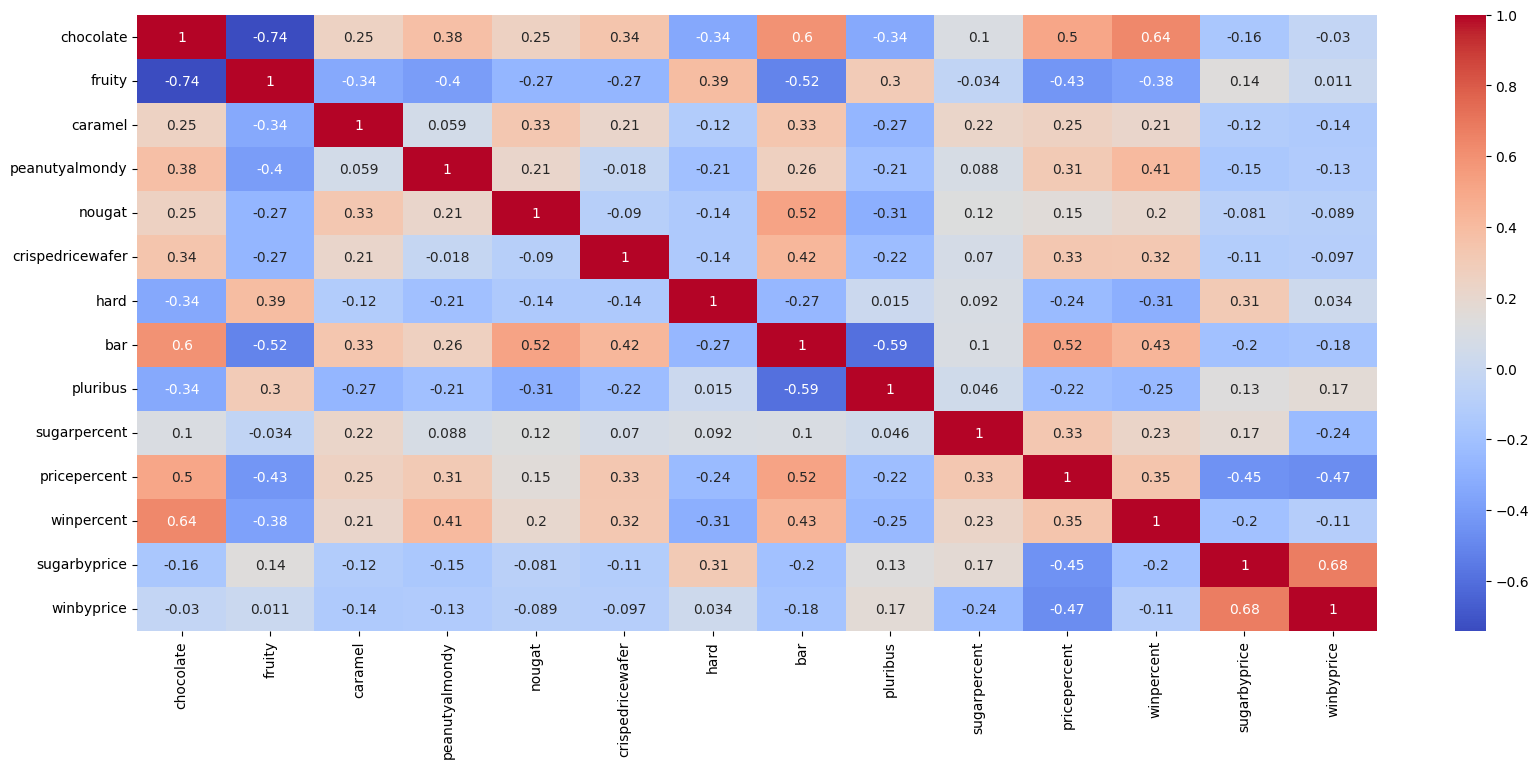

In [16]:
# Selecionar apenas as colunas num√©ricas
numeric_data = candy_rank.select_dtypes(include=['float64', 'int64'])

# Gerar o heatmap com os dados num√©ricos
plt.figure(figsize=(20,8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()

#Aplica√ß√£o de algoritmos de machine learning para realizar a tarefa de Regress√£o

##Regress√£o Linear Ridge
##Decision Tree
## Random Forest


Nesta se√ß√£o, aplicaremos tr√™s algoritmos de machine learning para realizar a tarefa de regress√£o com o conjunto de dados `candy_rank`.


Os algoritmos escolhidos s√£o Regress√£o Linear, √Årvore de Decis√£o Regressora e Random Forest Regressor. Ap√≥s o treinamento e valida√ß√£o de cada modelo, avaliaremos os resultados com m√©tricas apropriadas, como erro absoluto m√©dio (MAE) e R¬≤, para determinar o desempenho de cada algoritmo.


Ao final, indicaremos qual modelo apresentou o melhor desempenho na previs√£o da vari√°vel alvo.



  Adi√ß√£o de bibliotecas necess√°rias para o nosso treinamento de dados.

In [17]:
# Importa√ß√£o de bibliotecas necess√°rias
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error




X cont√©m as caracter√≠sticas do conjunto de dados candy_rank, excluindo as colunas competitorname, winpercent, sugarpercent, pricepercent, sugarbyprice e winbyprice.


y √© a vari√°vel alvo, que √© a coluna winpercent

MinMaxScaler para normalizar os dados em X, transformando os valores para um intervalo entre 0 e 1


sa train_test_split para separar os dados escalados em conjuntos de treinamento e teste. 80% dos dados s√£o usados para treino (X_train, y_train), e 20% s√£o reservados para teste (X_test, y_test)

In [18]:
# Definir X e y
X = candy_rank.drop(['competitorname', 'winpercent', 'sugarpercent', 'pricepercent', 'sugarbyprice', 'winbyprice'], axis=1)
y = candy_rank['winpercent']

#fica em x chocolate	fruity	caramel	peanutyalmondy	nougat	crispedricewafer	hard	bar	pluribus

# Escalar as vari√°veis
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Calcula o erro absoluto m√©dio **(mae_ridge)** e o erro quadr√°tico m√©dio **(mse_ridge)** comparando as previs√µes (y_pred_ridge) com os valores reais **(y_test)**.

In [19]:
# Regress√£o Linear (Ridge)
ridge = Ridge(alpha=1)  #cria um objeto do modelo de regress√£o Ridge com um valor espec√≠fico de alpha, que controla a for√ßa da regulariza√ß√£o
ridge.fit(X_train, y_train)

# Previs√µes no conjunto de teste
y_pred_ridge = ridge.predict(X_test) # Utiliza o modelo treinado para fazer previs√µes sobre o conjunto de teste (X_test).

# Avalia√ß√£o
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Ridge Regression - MAE: {mae_ridge}, MSE: {mse_ridge}")


Ridge Regression - MAE: 0.10487934854262222, MSE: 0.01623266058367211


In [20]:
# √Årvore de Decis√£o Regressor
tree = DecisionTreeRegressor(random_state=42) #nstancia um modelo de DecisionTreeRegressor, definindo uma semente aleat√≥ria (random_state) para garantir a reprodutibilidade.

tree.fit(X_train, y_train)#ajusta o modelo aos dados de treinamento (X_train e y_train) para aprender a rela√ß√£o entre as vari√°vei

# Gera Previs√µes no conjunto de teste
y_pred_tree = tree.predict(X_test)

# Avalia√ß√£o Calcula e exibe os erros absolutos m√©dios (MAE) e quadr√°ticos m√©dios (MSE) das previs√µes em compara√ß√£o com os valores reais.
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
print(f"Decision Tree Regression - MAE: {mae_tree}, MSE: {mse_tree}")


Decision Tree Regression - MAE: 0.12249747265837103, MSE: 0.021374408382463215


In [21]:
# Random Forest Regressor
forest = RandomForestRegressor(random_state=42, n_estimators=100) # Instancia um modelo de Random Forest Regressor, definindo o n√∫mero de √°rvores (n_estimators)
# cria semente aleat√≥ria (random_state) para garantir a reprodutibilidade.


forest.fit(X_train, y_train)

# Previs√µes no conjunto de teste
y_pred_forest = forest.predict(X_test)

# Avalia√ß√£o
mae_forest = mean_absolute_error(y_test, y_pred_forest) #Calcula e exibe os erros absolutos m√©dios (MAE) e quadr√°ticos m√©dios (MSE) das previs√µes em compara√ß√£o com os valores reais.
mse_forest = mean_squared_error(y_test, y_pred_forest)
print(f"Random Forest Regression - MAE: {mae_forest}, MSE: {mse_forest}")


Random Forest Regression - MAE: 0.11160959109864449, MSE: 0.018384018050170627


Avalia√ß√£o do erro absoluto m√©dio **(mae_ridge)** e o erro quadr√°tico m√©dio **(mse_ridge)**

In [22]:
# Comparar MAE e MSE dos tr√™s modelos
print(f"Ridge Regression - MAE: {mae_ridge}, MSE: {mse_ridge}")
print(f"Decision Tree Regression - MAE: {mae_tree}, MSE: {mse_tree}")
print(f"Random Forest Regression - MAE: {mae_forest}, MSE: {mse_forest}")


Ridge Regression - MAE: 0.10487934854262222, MSE: 0.01623266058367211
Decision Tree Regression - MAE: 0.12249747265837103, MSE: 0.021374408382463215
Random Forest Regression - MAE: 0.11160959109864449, MSE: 0.018384018050170627


#PCA

Para aplicar machine learning para realizar a tarefa de Clusteriza√ß√£o. Usaremos PCA em ambos para  diminuir a dimens√£o usada para transformar um conjunto menor, mas com alta variabilidade

Fazendo a importa√ß√£o do PCA com estados de randomizi√ß√£o e dropando a coluna compertiotorname


 **vari√¢ncia explicada indica a quantidade de informa√ß√£o dos dados que √© capturada por cada componente em uma an√°lise de PCA.**

In [23]:
from sklearn.decomposition import PCA # import.
pca = PCA(svd_solver='randomized', random_state=123) #instantiate.
pca.fit(candy_rank.drop('competitorname', axis=1)) # fit.

PCA(random_state=123, svd_solver='randomized')

**Primeiro gr√°fico:** Mostra a vari√¢ncia explicada por cada componente principal do PCA.

**Segundo gr√°fico:** Mostra a vari√¢ncia explicada acumulada √† medida que o n√∫mero de componentes aumenta.

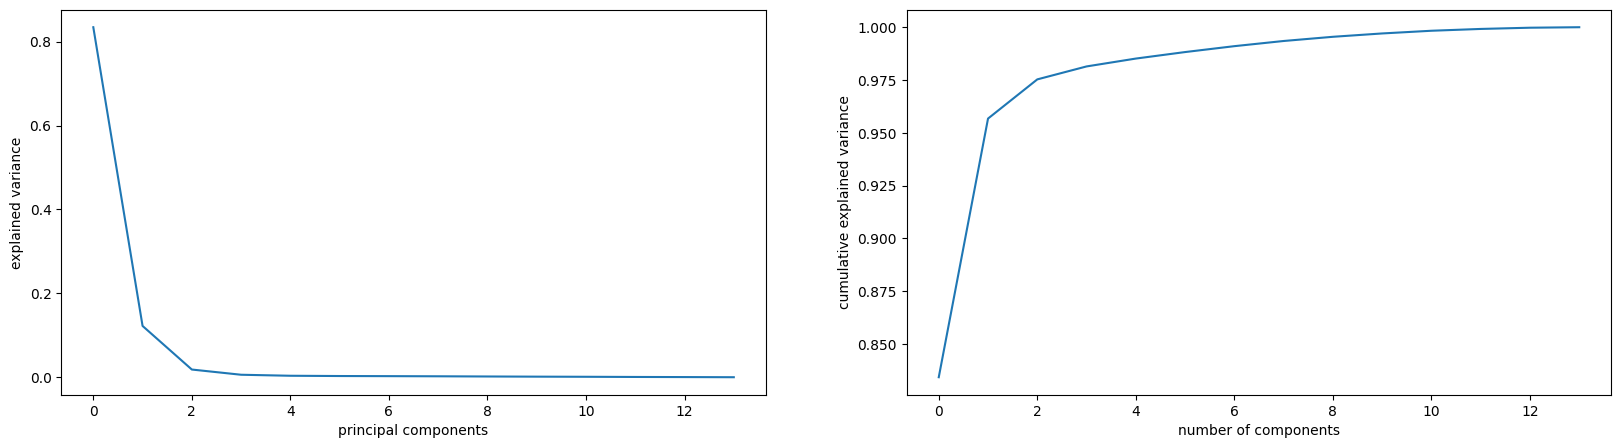

In [24]:
# Fazendo o screeplot - tra√ßando a varia√ß√£o acumulativa em rela√ß√£o ao n√∫mero de componentes

fig = plt.figure(figsize = (20,5))
ax = plt.subplot(121)
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('principal components')
plt.ylabel('explained variance')

ax2 = plt.subplot(122)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

plt.show()

Calcula e retorna a soma da vari√¢ncia explicada pelos primeiros 2, 3 e 4 componentes principais do PCA, arredondada para 3 casas decimais.

In [25]:
(pca.explained_variance_ratio_[0:2].sum().round(3),
pca.explained_variance_ratio_[0:3].sum().round(3),
pca.explained_variance_ratio_[0:4].sum().round(3))

(0.957, 0.975, 0.981)

Cria um novo dataframe **candy_rank_pca_2_comp** contendo dois primeiros componentes principais (PC1 e PC2) e dropando a coluna competitorname

In [26]:
candy_rank_pca_2_comp = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':candy_rank.drop('competitorname', axis=1).columns})

O gr√°fico mostra como as vari√°veis originais contribuem para os dois primeiros componentes principais da PCA, com cada ponto representando uma vari√°vel e seus nomes.

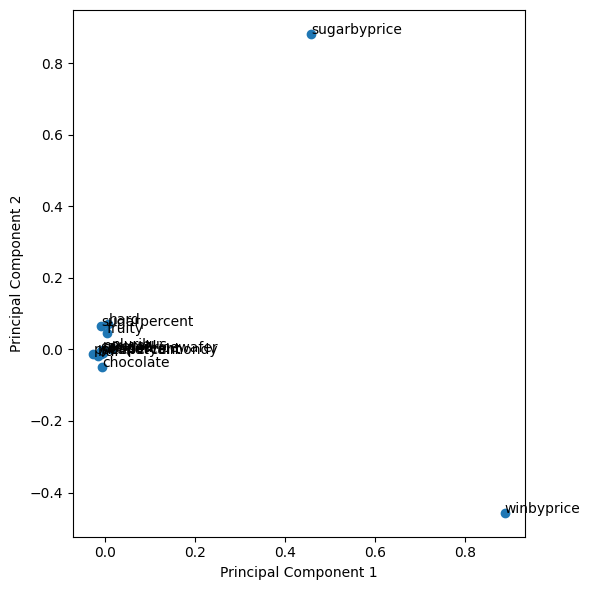

In [27]:
# podemos visualizar o que os componentes principais parecem capturar.

fig = plt.figure(figsize = (6,6))
plt.scatter(candy_rank_pca_2_comp.PC1, candy_rank_pca_2_comp.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(candy_rank_pca_2_comp.Feature):
    plt.annotate(txt, (candy_rank_pca_2_comp.PC1[i],candy_rank_pca_2_comp.PC2[i]))
plt.tight_layout()
plt.show()

In [28]:
candy_rank_pca = pca.transform(candy_rank.drop('competitorname', axis=1)) # nossos dados foram transformados com novos recursos como componentes principais.
candy_rank_pca = candy_rank_pca[:, 0:2] # Uma vez que exigimos apenas os dois primeiros componentes principais.

O c√≥digo aplica padroniza√ß√£o aos dados de PCA (candy_rank_pca), ajustando a m√©dia para 0 e a vari√¢ncia para 1 (normaliza√ß√£o), usando o StandardScaler

In [29]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
candy_rank_scaler = standard_scaler.fit_transform(candy_rank_pca) # scaler em candy_rank_scaler significa escalado.

Abaixo est√£o os gr√°ficos de dispers√£o e histogramas para visualizar rela√ß√µes e distribui√ß√µes entre as vari√°veis padronizadas em candy_rank_scaler

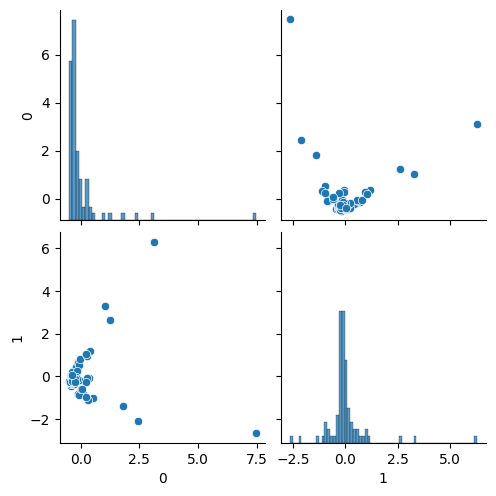

In [30]:
sns.pairplot(pd.DataFrame(candy_rank_scaler)) # Tente obter alguma intui√ß√£o dos dados.


A fun√ß√£o **Hopkins** calcula o √≠ndice de Hopkins, que mede a tend√™ncia de agrupamento dos dados. O valor varia de 0 (distribui√ß√£o aleat√≥ria) a 1 (alta concentra√ß√£o de clusters). √â usado para avaliar se os dados possuem uma estrutura de agrupamento.

In [31]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

O c√≥digo define a fun√ß√£o hopkins(X), que calcula o √≠ndice de Hopkins para um conjunto de dados
ùëã
X. Este √≠ndice mede a aleatoriedade dos dados, ajudando a determinar se os pontos est√£o agrupados ou distribu√≠dos aleatoriamente. O c√°lculo envolve:

**Inicializa√ß√£o:** Obt√©m o n√∫mero de colunas (
ùëë
d) e linhas (
ùëõ
n) do conjunto de dados.


**Amostragem:** Seleciona uma amostra aleat√≥ria de
10
%
10% das linhas.


**C√°lculo de Dist√¢ncias**: Para cada ponto da amostra, calcula a dist√¢ncia at√© os pontos mais pr√≥ximos no espa√ßo aleat√≥rio (distribui√ß√£o uniforme) e nos dados originais.


**C√°lculo do √çndice de Hopkins:** Retorna o √≠ndice, que varia de
0
0 (distribui√ß√£o aleat√≥ria) a
1
1 (alta concentra√ß√£o de pontos).

In [32]:
def hopkins(X):
    d = X.shape[1] #colunas
    n = len(X) # linhas
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0

    return H

O valor retornado representa o √≠ndice de Hopkins, que indica a tend√™ncia dos dados a formar clusters:

**Valor pr√≥ximo de 0:** Os dados est√£o distribu√≠dos aleatoriamente, sem estrutura de agrupamento.

**Valor pr√≥ximo de 1**: Os dados apresentam uma alta concentra√ß√£o em clusters, sugerindo que existe uma estrutura de agrupamento significativa.

In [33]:
hopkins(pd.DataFrame(candy_rank_scaler))


0.9717212243509069

#KMEANS

In [34]:
from sklearn.cluster import KMeans # importa√ß√£o # pontua√ß√µes de silhueta para escolher o n√∫mero de clusters.
from sklearn.metrics import silhouette_score

Define a variavel de silhueta de score para calcula a pontua√ß√£o de silhueta para diferentes n√∫meros de clusters.

sse_ para armazenar o n√∫mero de clusters (k) e suas respectivas pontua√ß√µes de silhueta.

Aplica o algoritmo K-Means com k clusters nos dados escalados (candy_rank_scaler).

Por fim salva os valores dos scores e plota o grafico com os mesmos

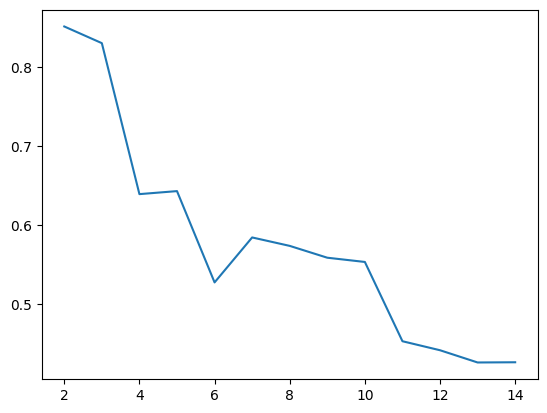

In [35]:
def sil_score(candy_rank):
    sse_ = []
    for k in range(2, 15):
        kmeans = KMeans(n_clusters=k, random_state=123).fit(candy_rank_scaler) # fit.
        sse_.append([k, silhouette_score(candy_rank, kmeans.labels_)])
    plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])

sil_score(candy_rank_scaler)

Calcula a In√©rcia: Para cada n√∫mero de clusters de 1 a 18, ajusta um modelo KMeans e armazena a soma dos quadrados das dist√¢ncias (in√©rcia) e depois plota os resultados

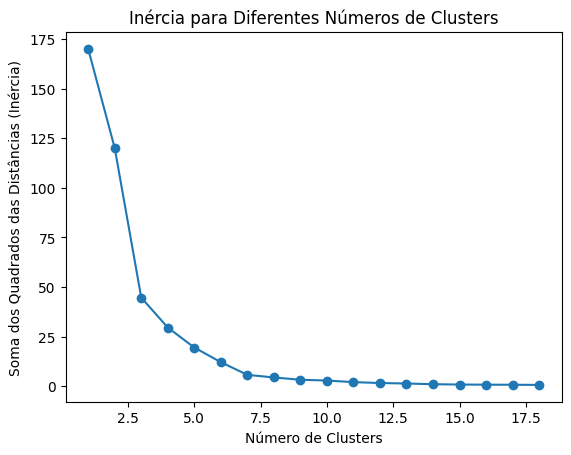

In [36]:
def plot_ssd(candy_rank):
    ssd = []
    for num_clusters in range(1, 19):
        model_clus = KMeans(n_clusters=num_clusters, max_iter=50, random_state=123)
        model_clus.fit(candy_rank)
        ssd.append(model_clus.inertia_)

    plt.plot(range(1, 19), ssd, marker='o')  # Plota a in√©rcia em fun√ß√£o do n√∫mero de clusters
    plt.xlabel('N√∫mero de Clusters')  # R√≥tulo para o eixo X
    plt.ylabel('Soma dos Quadrados das Dist√¢ncias (In√©rcia)')  # R√≥tulo para o eixo Y
    plt.title('In√©rcia para Diferentes N√∫meros de Clusters')  # T√≠tulo do gr√°fico
    plt.show()  # Exibe o gr√°fico

plot_ssd(candy_rank_scaler)


Abaixo iremos cria um modelo de KMeans com 2 clusters e um m√°ximo de 50 itera√ß√µes. Em seguida, ajusta (treina) o modelo usando os dados escalados

In [37]:
km2c = KMeans(n_clusters=2, max_iter=50, random_state=93)
km2c.fit(candy_rank_scaler)

KMeans(max_iter=50, n_clusters=2, random_state=93)

Cria uma c√≥pia do DataFrame candy_rank e a armazena em candy_rank_dummy.
Concatena os r√≥tulos dos clusters, combina candy_rank_dummy. resultando em um novo DataFrame candy_rank_km2c

 Renomeia a coluna que cont√©m os r√≥tulos dos clusters para "Cluster ID"

In [38]:
candy_rank_dummy = pd.DataFrame.copy(candy_rank)
candy_rank_km2c = pd.concat([candy_rank_dummy, pd.Series(km2c.labels_)], axis=1)
candy_rank_km2c.rename(columns={0:'Cluster ID'}, inplace=True)


A linha renomeia as colunas do DataFrame candy_rank_km2c para "PC1", "PC2" e "Cluster ID"

In [39]:
candy_rank_dummy = pd.DataFrame.copy(pd.DataFrame(candy_rank_scaler))
candy_rank_km2c = pd.concat([candy_rank_dummy, pd.Series(km2c.labels_)], axis=1)
candy_rank_km2c.columns = ['PC1', 'PC2', 'Cluster ID']

O gr√°fico de dispers√£o que mostra a rela√ß√£o entre as vari√°veis "PC1" e "PC2" no DataFrame candy_rank_km2c. A vari√°vel hue='Cluster ID' √© utilizada para colorir os pontos de acordo com os diferentes clusters identificados

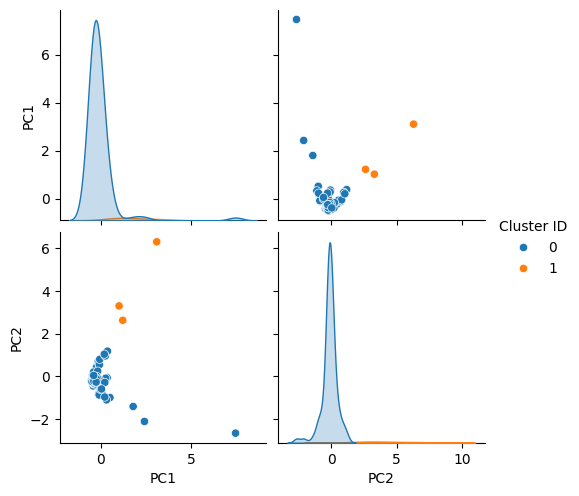

In [40]:
sns.pairplot(data=candy_rank_km2c, vars=['PC1', 'PC2'], hue='Cluster ID')

Inicializando um novo cluster com 5 clusters para o KMEANS com no maximo 50 intera√ß√µes e garantindo a randomidade entre eles com seu estado de intera√ß√£o de 123

In [41]:
km5c = KMeans(n_clusters=5, max_iter=50, random_state=123)
km5c.fit(candy_rank_scaler)

KMeans(max_iter=50, n_clusters=5, random_state=123)

cria uma c√≥pia do DataFrame candy_rank chamada candy_rank_dummy, em seguida, concatena essa c√≥pia com uma s√©rie que cont√©m os r√≥tulos dos clusters obtidos com o modelo km5c. O resultado √© armazenado em candy_rank_km2c

In [42]:
candy_rank_dummy = pd.DataFrame.copy(candy_rank)
candy_rank_km2c = pd.concat([candy_rank_dummy, pd.Series(km5c.labels_)], axis=1)
candy_rank_km2c.rename(columns={0:'Cluster ID'}, inplace=True)

Copia os dados escalados em seguida concatena r√≥tulos de cluster e por fim renomeia as colunas do novo DataFrame para PC1, PC2, e Cluster ID

In [43]:
candy_rank_dummy = pd.DataFrame.copy(pd.DataFrame(candy_rank_scaler))
candy_rank_pcakm2c = pd.concat([candy_rank_dummy, pd.Series(km5c.labels_)], axis=1)
candy_rank_pcakm2c.columns = ['PC1', 'PC2', 'Cluster ID']

In [44]:
print(candy_rank_pcakm2c.columns)


Index(['PC1', 'PC2', 'Cluster ID'], dtype='object')


  Gr√°fico de dispers√£o: Cria um gr√°fico de dispers√£o (scatter plot) para as vari√°veis especificadas (PC1 e PC2), mostrando a rela√ß√£o entre essas duas componentes principais

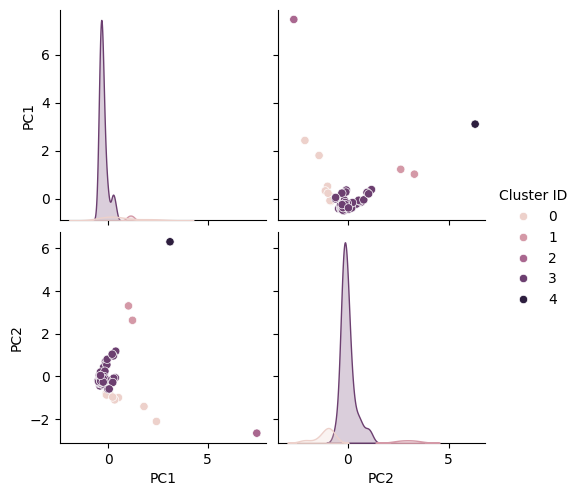

In [45]:
sns.pairplot(data=candy_rank_pcakm2c, vars=['PC1', 'PC2'], hue='Cluster ID')


C√≥digo calcula a m√©dia de cada vari√°vel num√©rica dentro de cada cluster

In [46]:
candy_rank_km2c.groupby('Cluster ID').mean(numeric_only=True)

chocolate  fruity  caramel  peanutyalmondy  nougat  \
Cluster ID                                                       
0                0.25    0.50     0.00            0.12     0.0   
1                0.00    0.50     0.00            0.00     0.0   
2                1.00    0.00     0.00            0.00     0.0   
3                0.47    0.44     0.19            0.18     0.1   
4                0.00    1.00     0.00            0.00     0.0   

            crispedricewafer  hard   bar  pluribus  sugarpercent  \
Cluster ID                                                         
0                        0.0  0.12  0.00      0.62          0.07   
1                        0.0  1.00  0.00      1.00          0.65   
2                        0.0  0.00  0.00      1.00          0.17   
3                        0.1  0.15  0.29      0.49          0.52   
4                        0.0  1.00  0.00      0.00          0.73   

            pricepercent  winpercent  sugarbyprice  winbyprice  
Cluster ID                                                      
0                   0.11        0.50          1.37        6.78  
1                   0.06        0.32         10.21        5.13  
2                   0.01        0.46         15.82       41.58  
3                   0.53        0.51          1.24        1.30  
4                   0.03        0.39         21.53       11.61

Abaixo iremos remover do DataFrame as linhas pertencentes ao cluster com ID 0

In [47]:
candy_rank_km2c[candy_rank_km2c['Cluster ID']!=0]


competitorname  chocolate  fruity  caramel  peanutyalmondy  \
0                     100 Grand          1       0        1               0   
1                  3 Musketeers          1       0        0               0   
3                   One quarter          0       0        0               0   
4                     Air Heads          0       1        0               0   
5                    Almond Joy          1       0        0               1   
6                     Baby Ruth          1       0        1               1   
7            Boston Baked Beans          0       0        0               1   
8                    Candy Corn          0       0        0               0   
9            Caramel Apple Pops          0       1        1               0   
10              Charleston Chew          1       0        0               0   
11   Chewey Lemonhead Fruit Mix          0       1        0               0   
12                     Chiclets          0       1        0               0   
13                         Dots          0       1        0               0   
14                     Dum Dums          0       1        0               0   
16                      Fun Dip          0       1        0               0   
17                   Gobstopper          0       1        0               0   
18            Haribo Gold Bears          0       1        0               0   
19            Haribo Happy Cola          0       0        0               0   
20            Haribo Sour Bears          0       1        0               0   
21           Haribo Twin Snakes          0       1        0               0   
23            Hershey's Krackel          1       0        0               0   
24     Hershey's Milk Chocolate          1       0        0               0   
25       Hershey's Special Dark          1       0        0               0   
26                   Jawbusters          0       1        0               0   
27                 Junior Mints          1       0        0               0   
28                      Kit Kat          1       0        0               0   
29                  Laffy Taffy          0       1        0               0   
31  Lifesavers big ring gummies          0       1        0               0   
32          Peanut butter M&M's          1       0        0               1   
33                        M&M's          1       0        0               0   
34                   Mike & Ike          0       1        0               0   
35                    Milk Duds          1       0        1               0   
36                    Milky Way          1       0        1               0   
37           Milky Way Midnight          1       0        1               0   
38     Milky Way Simply Caramel          1       0        1               0   
39                       Mounds          1       0        0               0   
40                  Mr Good Bar          1       0        0               1   
41                        Nerds          0       1        0               0   
42          Nestle Butterfinger          1       0        0               1   
43                Nestle Crunch          1       0        0               0   
44                    Nik L Nip          0       1        0               0   
45                  Now & Later          0       1        0               0   
46                       Payday          0       0        0               1   
47                  Peanut M&Ms          1       0        0               1   
49                    Pop Rocks          0       1        0               0   
50                    Red vines          0       1        0               0   
52    Reese's Peanut Butter cup          1       0        0               1   
53               Reese's pieces          1       0        0               1   
54  Reese's stuffed with pieces          1       0        0               1   
55                     Ring pop          0       1        0        

Em seguida iremos converter a coluna 'Cluster ID' para uma vari√°vel bin√°ria onde 1 representa clusters diferentes de 0 e 0 permanece o mesmo

In [48]:
candy_rank_km2c['Cluster ID'] = candy_rank_km2c['Cluster ID'].map(lambda x: 1 if (x!=0) else 0)


In [49]:
candy_rank_km2c.groupby('Cluster ID').mean(numeric_only=True)


chocolate  fruity  caramel  peanutyalmondy  nougat  \
Cluster ID                                                       
0                0.25    0.50     0.00            0.12    0.00   
1                0.45    0.44     0.18            0.17    0.09   

            crispedricewafer  hard   bar  pluribus  sugarpercent  \
Cluster ID                                                         
0                       0.00  0.12  0.00      0.62          0.07   
1                       0.09  0.18  0.27      0.51          0.52   

            pricepercent  winpercent  sugarbyprice  winbyprice  
Cluster ID                                                      
0                   0.11         0.5          1.37        6.78  
1                   0.51         0.5          1.93        2.05

Exclui colunas desnecess√°rias para a previs√£o de X (vari√°veis independentes).

Define X como as vari√°veis preditoras e y como a vari√°vel alvo (winpercent).

Usa o MinMaxScaler para normalizar os valores de X entre 0 e 1.

In [50]:
# Remover colunas irrelevantes para a previs√£o e definir X e y
X = candy_rank.drop(['competitorname', 'winpercent', 'sugarpercent', 'pricepercent', 'sugarbyprice', 'winbyprice'], axis=1)
y = candy_rank['winpercent']

# Escalar as vari√°veis usando MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
X_scaled = minmax_scaler.fit_transform(X)  # Aplicar a escala aos dados X



Iremos criar um modelo de Regress√£o Ridge usando o Ridge() da biblioteca linear_model com um par√¢metro de semente aleat√≥ria (random_state=123)

In [51]:
# Importando o modelo Ridge
from sklearn import linear_model
lr_rdg = linear_model.Ridge(random_state=123)  # Instanciando o modelo

realiza uma busca por hiperpar√¢metros para o modelo de Regress√£o Ridge (lr_rdg) usando valida√ß√£o cruzada.

Usamos o GridSearchCV para testar diferentes valores de alpha (coeficiente de regulariza√ß√£o)

avalia o desempenho do modelo com base no erro absoluto m√©dio negativo (neg_mean_absolute_error).

Por fim busca ajusta o melhor modelo com os dados escalados.

In [52]:
# Definindo os hiperpar√¢metros
from sklearn.model_selection import GridSearchCV
hyperparameters = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}

# Realizando a busca por grid com valida√ß√£o cruzada (cross-validation), incluindo o retorno dos scores de treino
model_cv = GridSearchCV(estimator=lr_rdg, param_grid=hyperparameters, cv=10, scoring='neg_mean_absolute_error', return_train_score=True)

# Ajustando o modelo com os dados escalados
model_cv.fit(X_scaled, y)



GridSearchCV(cv=10, estimator=Ridge(random_state=123),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error')

Converte os resultados da busca de hiperpar√¢metros do GridSearchCV para um DataFrame

ajusta os valores de alpha para o tipo float32

plota os erros m√©dios absolutos negativos de treino e teste em fun√ß√£o dos valores de alpha.

O gr√°fico gerado ajuda a visualizar como a varia√ß√£o de alpha afeta o desempenho do modelo.

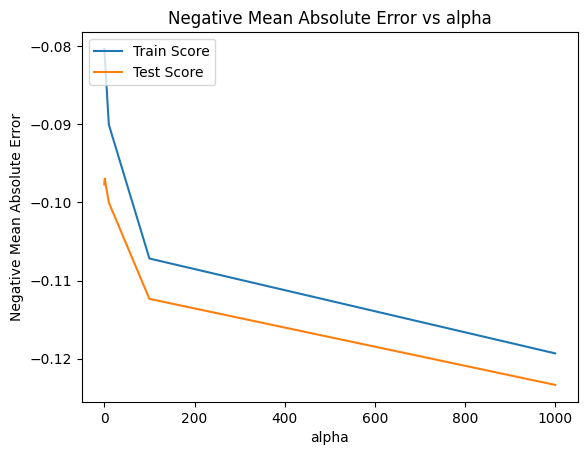

In [53]:
# Convertendo os resultados do GridSearch para um DataFrame
cv_results = pd.DataFrame(model_cv.cv_results_)

# Convertendo os par√¢metros alpha para tipo float32
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# Plotando os resultados de treino e teste em fun√ß√£o de alpha
import matplotlib.pyplot as plt
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'], label='Train Score')  # Mean train score
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'], label='Test Score')  # Mean test score
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error vs alpha")
plt.legend(loc='upper left')
plt.show()





Retorna os melhores hiperpar√¢metros encontrados durante o processo de busca por hiperpar√¢metros (GridSearchCV)

Alpha regula o equil√≠brio entre o ajuste do modelo e sua capacidade de generaliza√ß√£o, controlando o qu√£o fortemente o modelo deve penalizar os coeficientes

In [54]:
# Obtendo o melhor valor do parametro alpha
model_cv.best_params_



{'alpha': 1}

Configura e treina um modelo de regress√£o Ridge com o hiperpar√¢metro de regulariza√ß√£o otimizado

In [55]:
# Definindo o valor de alpha encontrado
alpha = model_cv.best_params_['alpha']

# Ajustando o modelo Ridge com o alpha ideal
ridge = linear_model.Ridge(alpha=alpha)
ridge.fit(X_scaled, y)



Ridge(alpha=1)

 O intercepto representa o valor previsto da vari√°vel dependente (y) quando todas as vari√°veis independentes (X) s√£o zero.

Em rela√ß√£o ao valor:

Perto de zero: Sugere que a previs√£o do modelo tende a ser pr√≥xima de zero quando as vari√°veis independentes n√£o influenciam.
Pr√≥ximo de um: Indica que, quando todas as vari√°veis independentes s√£o zero, o modelo prev√™ um valor de 1.

In [56]:
# Exibindo o termo constante (intercepto)
ridge.intercept_


0.372788599057167

O for percorre cada feature e seu respectivo coeficiente, multiplicando o coeficiente por 100 para express√°-lo em porcentagem.

A sa√≠da mostra como cada feature influencia a previs√£o do modelo, coeficientes positivos indicam uma rela√ß√£o direta (aumentos na feature aumentam a previs√£o), enquanto coeficientes negativos indicam uma rela√ß√£o inversa.

In [57]:
# Exibindo os coeficientes do modelo para cada feature
for feature, coef in zip(X.columns, ridge.coef_):
    print(f'{feature}: {coef * 100}')


chocolate: 17.395113450849355
fruity: 7.720639686401813
caramel: 2.907233687069858
peanutyalmondy: 9.094281846468235
nougat: 1.3764952562193944
crispedricewafer: 7.301821467840014
hard: -4.442497827630219
bar: 0.7309590882068199
pluribus: -0.14235867560122065


#DBSCAN

Impota√ß√£o de bibliotecas necess√°rias para implementa√ß√£o do DBSCAN, medidas metricas de desempenho como silhoette score e normaliza√ß√£o de dados com MinMaxScaler

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler



Normaliza√ß√£o os dados, garantindo que todas as vari√°veis fiquem entre 0 e 1.

In [59]:
# Normaliza√ß√£o
scaler = MinMaxScaler()
candy_rank_scaled = scaler.fit_transform(candy_rank.drop('competitorname', axis=1))






*   PCA: Reduz os dados originais para 2 componentes principais  (PC1 e PC2).

*   DBSCAN: Aplica o algoritmo de clusteriza√ß√£o com par√¢metros eps=0.5 e min_samples=5.

* Usa eps=0.5 (dist√¢ncia m√°xima para considerar dois pontos no mesmo cluster) e min_samples=5 (n√∫mero m√≠nimo de pontos para formar um cluster).

* Clusters: Adiciona os r√≥tulos de clusters gerados pelo DBSCAN ao DataFrame, com as colunas 'PC1', 'PC2' e 'Cluster ID'. O campo Cluster ID cont√©m os r√≥tulos que identificam a qual cluster cada ponto pertence, ou se foi classificado como ru√≠do.


In [60]:
# PCA para reduzir para 2 componentes principais
pca = PCA(n_components=2)
candy_rank_pca = pca.fit_transform(candy_rank_scaled)

# DBSCAN com par√¢metros iniciais
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(candy_rank_pca)

# Adicionando os clusters ao dataframe
candy_dbscan = pd.DataFrame(candy_rank_pca, columns=['PC1', 'PC2'])
candy_dbscan['Cluster ID'] = dbscan.labels_


Calcula a vari√¢ncia explicada por cada componente principal ap√≥s aplicar o PCA.

Soma cumulativamente a vari√¢ncia explicada para gerar a vari√¢ncia acumulada

 Mostra o n√∫mero de componentes principais no eixo X e a vari√¢ncia acumulada no eixo Y, indicando quantos componentes s√£o necess√°rios para explicar uma porcentagem significativa da vari√¢ncia.


 GRAFICO LINHA CRESCENTE: indica que a vari√¢ncia explicada pelos componentes principais est√° aumentando de maneira constante com cada componente adicionado.


 **vari√¢ncia explicada indica a quantidade de informa√ß√£o dos dados que √© capturada por cada componente em uma an√°lise de PCA.**

 O valor que informa qu√£o confi√°vel um modelo que descreve um fen√¥meno observado parece ser. A vari√¢ncia explicada mostra quanto dessas diferen√ßas nas escolhas podem ser explicadas pelas caracter√≠sticas que voc√™ est√° analisando

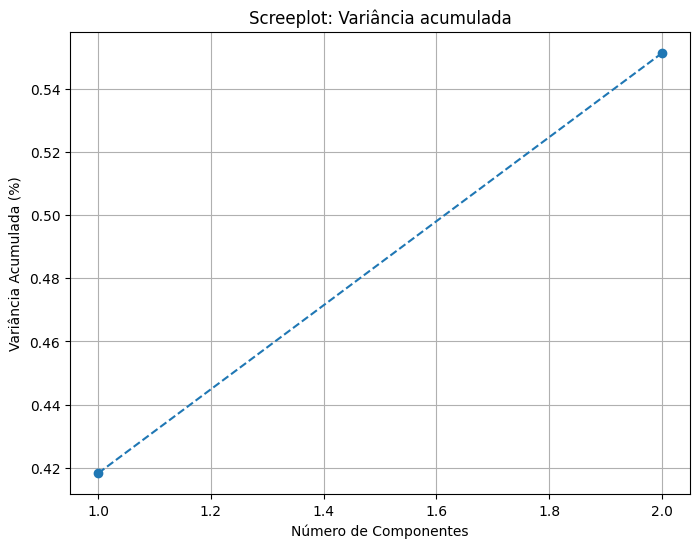

In [61]:
# Vari√¢ncia explicada para cada componente
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot do screeplot
plt.figure(figsize=(8,6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Screeplot: Vari√¢ncia acumulada')
plt.xlabel('N√∫mero de Componentes')
plt.ylabel('Vari√¢ncia Acumulada (%)')
plt.grid(True)
plt.show()


Apresenta√ß√£o da visualiza√ß√£o como os dados foram agrupados em clusters ap√≥s a aplica√ß√£o do DBSCAN com os dados reduzidos pelo PCA

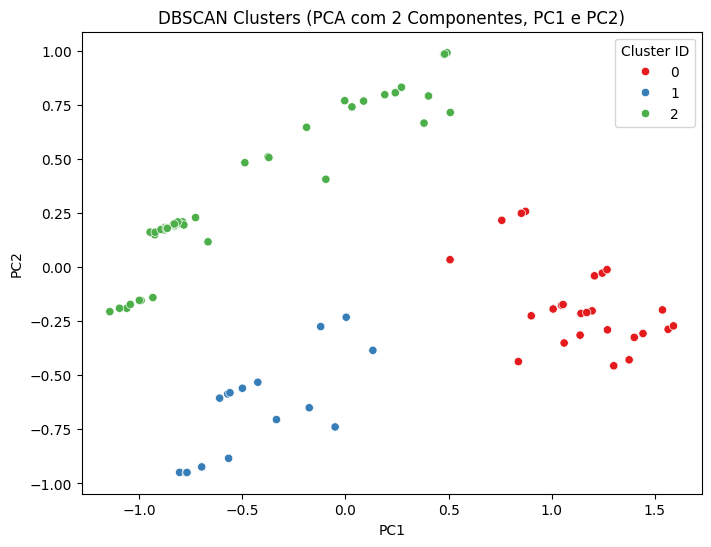

In [62]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster ID', data=candy_dbscan, palette='Set1', legend='full')
plt.title('DBSCAN Clusters (PCA com 2 Componentes, PC1 e PC2)')
plt.show()


* X_train e X_test dividem os dados escalados (candy_rank_scaled) em 70% para treino e 30% para teste.

* √© fixado em 5, determinando o n√∫mero m√≠nimo de pontos necess√°rios para formar um cluster

*  cria uma faixa de valores de epsilon (0.1 a 1.0), que ser√£o usados para testar diferentes dist√¢ncias de vizinhan√ßa no algoritmo DBSCAN.

In [63]:
from sklearn.model_selection import train_test_split

# Dividindo os dados em treino e teste
X_train, X_test = train_test_split(candy_rank_scaled, test_size=0.3, random_state=42)

# Fixar min_samples e variar eps
min_samples = 5  # valor fixo
eps_values = np.arange(0.1, 1.0, 0.1)  # valores de eps em intervalos menores para suavizar a linha


In [64]:
# Cria duas listas vazias, train_scores e test_scores, para armazenar os resultados de desempenho do modelo durante o treinamento e o teste.
train_scores = []
test_scores = []


* O for √© definido par√¢metro eps define o raio m√°ximo para considerar um ponto vizinho no DBSCAN. O c√≥digo varia eps de 0.1 a 0.9 (definido por eps_values) (epsilon)

* Para cada valor de eps, o DBSCAN √© ajustado (treinado) no conjunto de dados de treino (X_train) e aplicado no conjunto de teste (X_test)

* O silhouette score mede a qualidade dos clusters formados, avaliando o qu√£o bem as inst√¢ncias est√£o agrupadas e o qu√£o distintas est√£o em rela√ß√£o a outros clusters.

* As pontua√ß√µes de silhouette tanto para o conjunto de treino quanto para o conjunto de teste s√£o armazenadas nas listas train_scores e test_scores, respectivamente. Se n√£o houver m√∫ltiplos clusters, um NaN √© salvo



In [65]:
# Loop pelos par√¢metros para calcular os silhouette scores
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)

    # Ajustar DBSCAN no conjunto de treino
    train_labels = dbscan.fit_predict(X_train)
    test_labels = dbscan.fit_predict(X_test)

    # Apenas calcular silhouette se houver mais de 1 cluster
    if len(set(train_labels)) > 1:
        train_score = silhouette_score(X_train, train_labels)
        train_scores.append(train_score)
    else:
        train_scores.append(np.nan)

    if len(set(test_labels)) > 1:
        test_score = silhouette_score(X_test, test_labels)
        test_scores.append(test_score)
    else:
        test_scores.append(np.nan)

* Gera um gr√°fico que compara os Silhouette Scores para conjuntos de treinamento e teste em rela√ß√£o a diferentes valores do par√¢metro eps do DBSCAN

* Eixo X: Valores de eps.

* Eixo Y: Silhouette Scores (medida de qualidade dos clusters).

*  Inicialmente, um aumento no valor de eps pode levar a uma melhor forma√ß√£o dos clusters, resultando em scores mais altos. Estabiliza√ß√£o: Ap√≥s um certo ponto, o aumento de eps pode n√£o melhorar mais a separa√ß√£o dos clusters, fazendo os scores se estabilizarem.

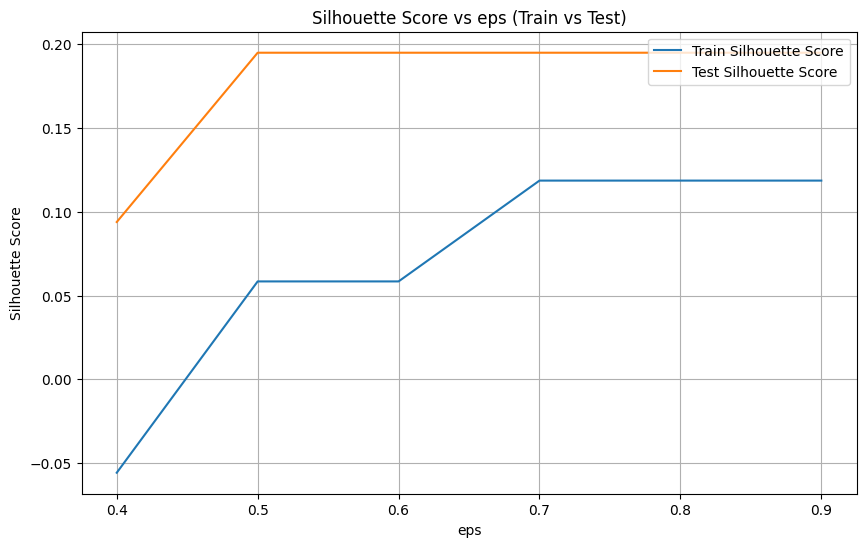

In [66]:
# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.plot(eps_values, train_scores, label='Train Silhouette Score')
plt.plot(eps_values, test_scores, label='Test Silhouette Score')
plt.xlabel('eps')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs eps (Train vs Test)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


Abaixo o loop testa diferentes combina√ß√µes de valores para os par√¢metros eps e min_samples do algoritmo DBSCAN, ajustando o modelo nos dados candy_rank_pca e calculando o Silhouette Score para avaliar a qualidade dos clusters gerados

* Loop Externo: Itera sobre tr√™s valores de eps (0.3, 0.5, 0.7).

* Loop Interno: Para cada valor de eps, itera sobre tr√™s valores de min_samples (3, 5, 7).

* Ajuste do DBSCAN: Para cada combina√ß√£o de eps e min_samples, o DBSCAN √© ajustado aos dados.

A melhor combina√ß√£o de resultados apresentada √©:

eps: 0.3, min_samples: 7, com Silhouette Score: 0.6027.  Representa a dist√¢ncia m√°xima entre dois pontos para que eles sejam considerados parte do mesmo cluster. Indica o n√∫mero m√≠nimo de pontos (ou amostras) necess√°rios para formar um cluster.

In [67]:
# Loop para testar diferentes valores de eps e min_samples
for eps in [0.3, 0.5, 0.7]:
    for min_samples in [3, 5, 7]:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(candy_rank_pca)

        # Calculando Silhouette Score
        if len(set(labels)) > 1:  # Apenas calcula o silhouette se houver mais de 1 cluster
            sil_score = silhouette_score(candy_rank_pca, labels)
            print(f'eps: {eps}, min_samples: {min_samples}, Silhouette Score: {sil_score}')


eps: 0.3, min_samples: 3, Silhouette Score: 0.5612337990542909
eps: 0.3, min_samples: 5, Silhouette Score: 0.6011937675158885
eps: 0.3, min_samples: 7, Silhouette Score: 0.6026692644797952
eps: 0.5, min_samples: 3, Silhouette Score: 0.5011644381339757
eps: 0.5, min_samples: 5, Silhouette Score: 0.5011644381339757
eps: 0.5, min_samples: 7, Silhouette Score: 0.5011644381339757


In [68]:
# GridSearch para encontrar o melhor alpha
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

#treinamento para encontrar um hiperparemetro

Remo√ß√£o de colunas irrelevantes e escolonamento de dados utilizando o MinMaxScaler, que transforma os dados para um intervalo entre 0 e 1.
O resultado do escalonamento √© atribu√≠do √† vari√°vel X_scaled, preparando os dados para a modelagem, o que pode melhorar a performance de muitos algoritmos de machine learning.

In [69]:

# Remover colunas irrelevantes e definir X e y
X = candy_rank.drop(['competitorname', 'winpercent', 'sugarpercent', 'pricepercent', 'sugarbyprice', 'winbyprice'], axis=1)
y = candy_rank['winpercent']

# Escalando os dados
X_scaled = MinMaxScaler().fit_transform(X)


Abaixo iremos configurar e executar uma busca em grade para otimizar os hiperpar√¢metros do modelo de regress√£o Ridge, utilizando valida√ß√£o cruzada para encontrar a melhor penaliza√ß√£o (valor de alpha) que minimize o erro absoluto m√©dio nas previs√µes

In [70]:
lr_rdg = linear_model.Ridge(random_state=123)
hyperparameters = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}
model_cv = GridSearchCV(estimator=lr_rdg, param_grid=hyperparameters, cv=10, scoring='neg_mean_absolute_error', return_train_score=True)
model_cv.fit(X_scaled, y)

GridSearchCV(cv=10, estimator=Ridge(random_state=123),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error')

Em seguida iremos inicializar e ajustar um modelo de regress√£o Ridge com o melhor hiperpar√¢metro de regulariza√ß√£o (alpha) encontrado anteriormente, preparando o modelo para previs√µes futuras.

In [71]:
# Melhor alpha e ajuste do modelo
alpha = model_cv.best_params_['alpha']
ridge = linear_model.Ridge(alpha=alpha)
ridge.fit(X_scaled, y)

Ridge(alpha=1)

o ponto onde a linha de regress√£o intercepta o eixo y no gr√°fico

Ele ajuda a interpretar como o modelo se comporta em rela√ß√£o ao valor m√©dio da vari√°vel de sa√≠da, especialmente quando as vari√°veis independentes t√™m valores baixos ou nulos.

In [72]:
# Exibindo o termo constante (intercepto)
ridge.intercept_


0.372788599057167

Por fim, fornece uma vis√£o geral dos par√¢metros do modelo, ajudando a interpretar como cada vari√°vel influencia a sa√≠da prevista.

In [73]:
# Exibir intercepto e coeficientes
print(f"Intercepto: {ridge.intercept_}")
for feature, coef in zip(X.columns, ridge.coef_):
    print(f'{feature}: {coef * 100}')

Intercepto: 0.372788599057167
chocolate: 17.395113450849355
fruity: 7.720639686401813
caramel: 2.907233687069858
peanutyalmondy: 9.094281846468235
nougat: 1.3764952562193944
crispedricewafer: 7.301821467840014
hard: -4.442497827630219
bar: 0.7309590882068199
pluribus: -0.14235867560122065


#Avalia√ß√£o Final dos resultados dos dois algoritmos de clusteriza√ß√£o e indicar qual foi o melhor

In [74]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


As vari√°veis kmeans_labels e dbscan_labels armazenam os resultados de agrupamento de cada m√©todo, permitindo comparar ou analisar as atribui√ß√µes de cluster de diferentes algoritmos.

In [75]:
kmeans_labels = candy_rank_km2c['Cluster ID']  # Labels do KMeans
dbscan_labels = candy_dbscan['Cluster ID']  # Labels do DBSCAN

Iremos calcular e imprimr as m√©tricas

* Silhouette

* Davies-Bouldin

* Calinski-Harabasz

Para avaliar a qualidade dos clusters gerados pelo algoritmo K-Means e DBSCAN. Cada uma dessas m√©tricas fornece uma perspectiva diferente sobre a forma√ß√£o dos clusters, ajudando a determinar o qu√£o bem os dados foram agrupados.

para o modelo **K-Means**, permitindo avaliar a qualidade do agrupamento realizado

In [76]:
# Calcular as m√©tricas para KMeans
kmeans_silhouette = silhouette_score(candy_rank_pca, kmeans_labels)
kmeans_davies_bouldin = davies_bouldin_score(candy_rank_pca, kmeans_labels)
kmeans_calinski_harabasz = calinski_harabasz_score(candy_rank_pca, kmeans_labels)

print(f"KMeans - Silhouette Score: {kmeans_silhouette}")
print(f"KMeans - Davies-Bouldin Index: {kmeans_davies_bouldin}")
print(f"KMeans - Calinski-Harabasz Index: {kmeans_calinski_harabasz}")

KMeans - Silhouette Score: -0.08195058802002343
KMeans - Davies-Bouldin Index: 3.5873961465980364
KMeans - Calinski-Harabasz Index: 1.573559234754428


Iremos calcular e imprimr as m√©tricas

* Silhouette

* Davies-Bouldin

* Calinski-Harabasz

para o modelo **DBSCAN**, permitindo avaliar a qualidade do agrupamento realizado

In [77]:
# Calcular as m√©tricas para DBSCAN
dbscan_silhouette = silhouette_score(candy_rank_pca, dbscan_labels)
dbscan_davies_bouldin = davies_bouldin_score(candy_rank_pca, dbscan_labels)
dbscan_calinski_harabasz = calinski_harabasz_score(candy_rank_pca, dbscan_labels)

print(f"DBSCAN - Silhouette Score: {dbscan_silhouette}")
print(f"DBSCAN - Davies-Bouldin Index: {dbscan_davies_bouldin}")
print(f"DBSCAN - Calinski-Harabasz Index: {dbscan_calinski_harabasz}")


DBSCAN - Silhouette Score: 0.5011644381339757
DBSCAN - Davies-Bouldin Index: 0.7673467313132333
DBSCAN - Calinski-Harabasz Index: 106.30536067381232


Imprime uma compara√ß√£o final entre K-Means e DBSCAN, identificando qual algoritmo se saiu melhor em cada uma das m√©tricas de avalia√ß√£o

In [78]:
# Compara√ß√£o final
print("\nCompara√ß√£o de m√©tricas de avalia√ß√£o de qualidade de clusters:")
print(f"Melhor Silhouette Score: {'KMeans' if kmeans_silhouette > dbscan_silhouette else 'DBSCAN'} (Maior √© melhor)")
print(f"Melhor Davies-Bouldin Index: {'KMeans' if kmeans_davies_bouldin < dbscan_davies_bouldin else 'DBSCAN'} (Menor √© melhor)")
print(f"Melhor Calinski-Harabasz Index: {'KMeans' if kmeans_calinski_harabasz > dbscan_calinski_harabasz else 'DBSCAN'} (Maior √© melhor)")


Compara√ß√£o de m√©tricas de avalia√ß√£o de qualidade de clusters:
Melhor Silhouette Score: DBSCAN (Maior √© melhor)
Melhor Davies-Bouldin Index: DBSCAN (Menor √© melhor)
Melhor Calinski-Harabasz Index: DBSCAN (Maior √© melhor)
